In [64]:
#import tensorflow as tf
import sys
sys.path.append('/nas/longleaf/home/siyangj/NiftyNet/')
#import niftynet as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk
import h5py

import os

data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1'
pretrain_path = '/proj/NIRAL/users/siyangj/myPretrainData/seg'

In [96]:
def summarize_label_stats(path,log=False):
    ret = np.zeros([0,4])
    for f in os.listdir(path):
        if f[-5:]!='.nrrd':
            continue
        arr = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(path,f)))
        labels,counts = np.unique(arr,return_counts=True)
        if log:
            print(labels)
        ret = np.vstack((ret,counts / np.size(arr)))
    return ret

In [37]:
data_counts = summarize_label_stats(data_path)

In [38]:
data_counts

array([[0.55854725, 0.1931317 , 0.18283226, 0.06548879],
       [0.52026658, 0.17538694, 0.23078265, 0.07356383],
       [0.56095184, 0.12740168, 0.23441763, 0.07722885],
       [0.45246233, 0.13773697, 0.29905289, 0.11074781],
       [0.56499663, 0.13780866, 0.22290233, 0.07429238],
       [0.57158552, 0.16580152, 0.20074366, 0.0618693 ],
       [0.58673483, 0.13184272, 0.20958601, 0.07183644],
       [0.47517613, 0.17499167, 0.25043306, 0.09939914]])

In [113]:
raw_d_weights_all = 1 / data_counts
d_weights_all = raw_d_weights_all / raw_d_weights_all.sum(axis=1)[:,None] * 4
d_weights_all

array([[0.25846599, 0.74749751, 0.78960609, 2.2044304 ],
       [0.30090878, 0.89261366, 0.67835596, 2.1281216 ],
       [0.26561346, 1.16950068, 0.63560219, 1.92928367],
       [0.40471584, 1.32948092, 0.61232873, 1.65347451],
       [0.26247353, 1.07610551, 0.66529885, 1.99612211],
       [0.24193531, 0.8340498 , 0.68887218, 2.23514271],
       [0.24364384, 1.08427927, 0.68207954, 1.98999735],
       [0.38486242, 1.04506368, 0.73024479, 1.83982911]])

In [114]:
dw_m = d_weights_all.mean(axis=0)
dw_s = d_weights_all.std(axis=0)

In [115]:
raw_p_weights_all = 1 / pretrain_count
p_weights_all = raw_p_weights_all / raw_p_weights_all.sum(axis=1)[:,None] * 4
pw_m = p_weights_all.mean(axis=0)
pw_s = p_weights_all.std(axis=0)

In [116]:
p_weights_all

array([[0.16094833, 0.80775838, 0.52695764, 2.50433564],
       [0.29603318, 0.99596716, 0.64195656, 2.0660431 ],
       [0.23008542, 0.83228339, 0.62007698, 2.31755421],
       ...,
       [0.15409721, 0.66224479, 0.48871488, 2.69494312],
       [0.15617935, 0.63264697, 0.49975089, 2.7114228 ],
       [0.10438997, 0.56499196, 0.40455541, 2.92606266]])

In [39]:
pretrain_count = summarize_label_stats(pretrain_path)

In [43]:
p_m = pretrain_count.mean(axis=0)

In [47]:
p_s = pretrain_count.std(axis=0)

In [48]:
d_m = data_counts.mean(axis=0)
d_s = data_counts.std(axis=0)

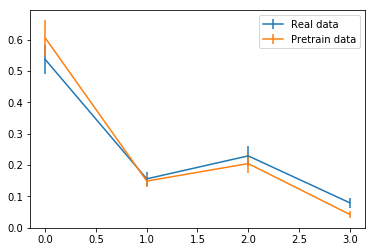

In [50]:
plt.figure()
plt.errorbar(range(4),d_m,yerr=d_s)
plt.errorbar(range(4),p_m,yerr=p_s)
plt.legend(['Real data','Pretrain data'])
plt.show()

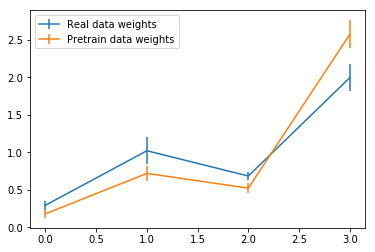

In [117]:
plt.figure()
plt.errorbar(range(4),dw_m,yerr=dw_s)
plt.errorbar(range(4),pw_m,yerr=pw_s)
plt.legend(['Real data weights','Pretrain data weights'])
plt.show()

In [52]:
p_m.sum()

1.0000000000000007

In [93]:
raw_d_weights = 1 / d_m
d_weights = raw_d_weights / raw_d_weights.sum() * 4
d_weights

array([0.29507895, 1.01768311, 0.69157511, 1.99566283])

In [94]:
raw_p_weights = 1 / p_m
p_weights = raw_p_weights / raw_p_weights.sum() * 4
p_weights

array([0.1789348 , 0.72904663, 0.52994981, 2.56206876])

In [120]:
print(dw_m,'\n',pw_m,'\n',d_weights,'\n',p_weights)

[0.2953274  1.02232388 0.68529854 1.99705018] 
 [0.18139336 0.71989869 0.52385821 2.57484974] 
 [0.29507895 1.01768311 0.69157511 1.99566283] 
 [0.1789348  0.72904663 0.52994981 2.56206876]
